In [1]:
import sys
import os
import numpy as np
import pandas as pd


In [2]:
#Read targets

targets_strand_df = pd.read_csv('/home/drk/seqnn/data/models/v2/f3c0/testg-0/acc.txt', index_col=0, sep='\t')#[['identifier', 'description']]


In [3]:
#Store original target indices

targets_strand_df['row_index'] = np.arange(len(targets_strand_df), dtype='int32')


In [4]:
#Load ensemble predictions

n_crosses = 4

df_pred = pd.read_csv("/home/drk/seqnn/data/models/v2/f3c0/testg-0/gene_preds.tsv", sep='\t')
df_pred = df_pred.rename(columns={'Unnamed: 0' : 'gene_id'})

#Get target columns from prediction dataframe
cols = df_pred.columns.values.tolist()[1:]

for ci in range(1, n_crosses) :

    #Load predictions
    df_pred_ci = pd.read_csv("/home/drk/seqnn/data/models/v2/f3c" + str(ci) + "/testg-0/gene_preds.tsv", sep='\t')
    df_pred_ci = df_pred_ci.rename(columns={'Unnamed: 0' : 'gene_id'})
    
    for target_col in cols :
        df_pred[target_col] += df_pred_ci[target_col]

for target_col in cols :
    df_pred[target_col] /= n_crosses

#Load targets
df_true = pd.read_csv("/home/drk/seqnn/data/models/v2/f3c0/testg-0/gene_targets.tsv", sep='\t')
df_true = df_true.rename(columns={'Unnamed: 0' : 'gene_id'})


In [5]:
#Print GTEx blood targets

targets_strand_df.loc[targets_strand_df['description'] == "RNA:blood"]


,identifier,pearsonr,r2,pearsonr_norm,r2_norm,pearsonr_gene,description,row_index
7531,GTEX-1I4MK-0002-SM-EZ6M9.1,0.873249,0.757142,0.594165,0.352284,0.809294,RNA:blood,875
7532,GTEX-1LB8K-0005-SM-DIPED.1,0.866665,0.747806,0.701900,0.492633,0.787898,RNA:blood,876
7533,GTEX-1OKEX-0006-SM-DKPQ2.1,0.831781,0.689066,0.627063,0.390677,0.775276,RNA:blood,877


Spearman R = 0.888
Pearson R = 0.885
 - n = 1940


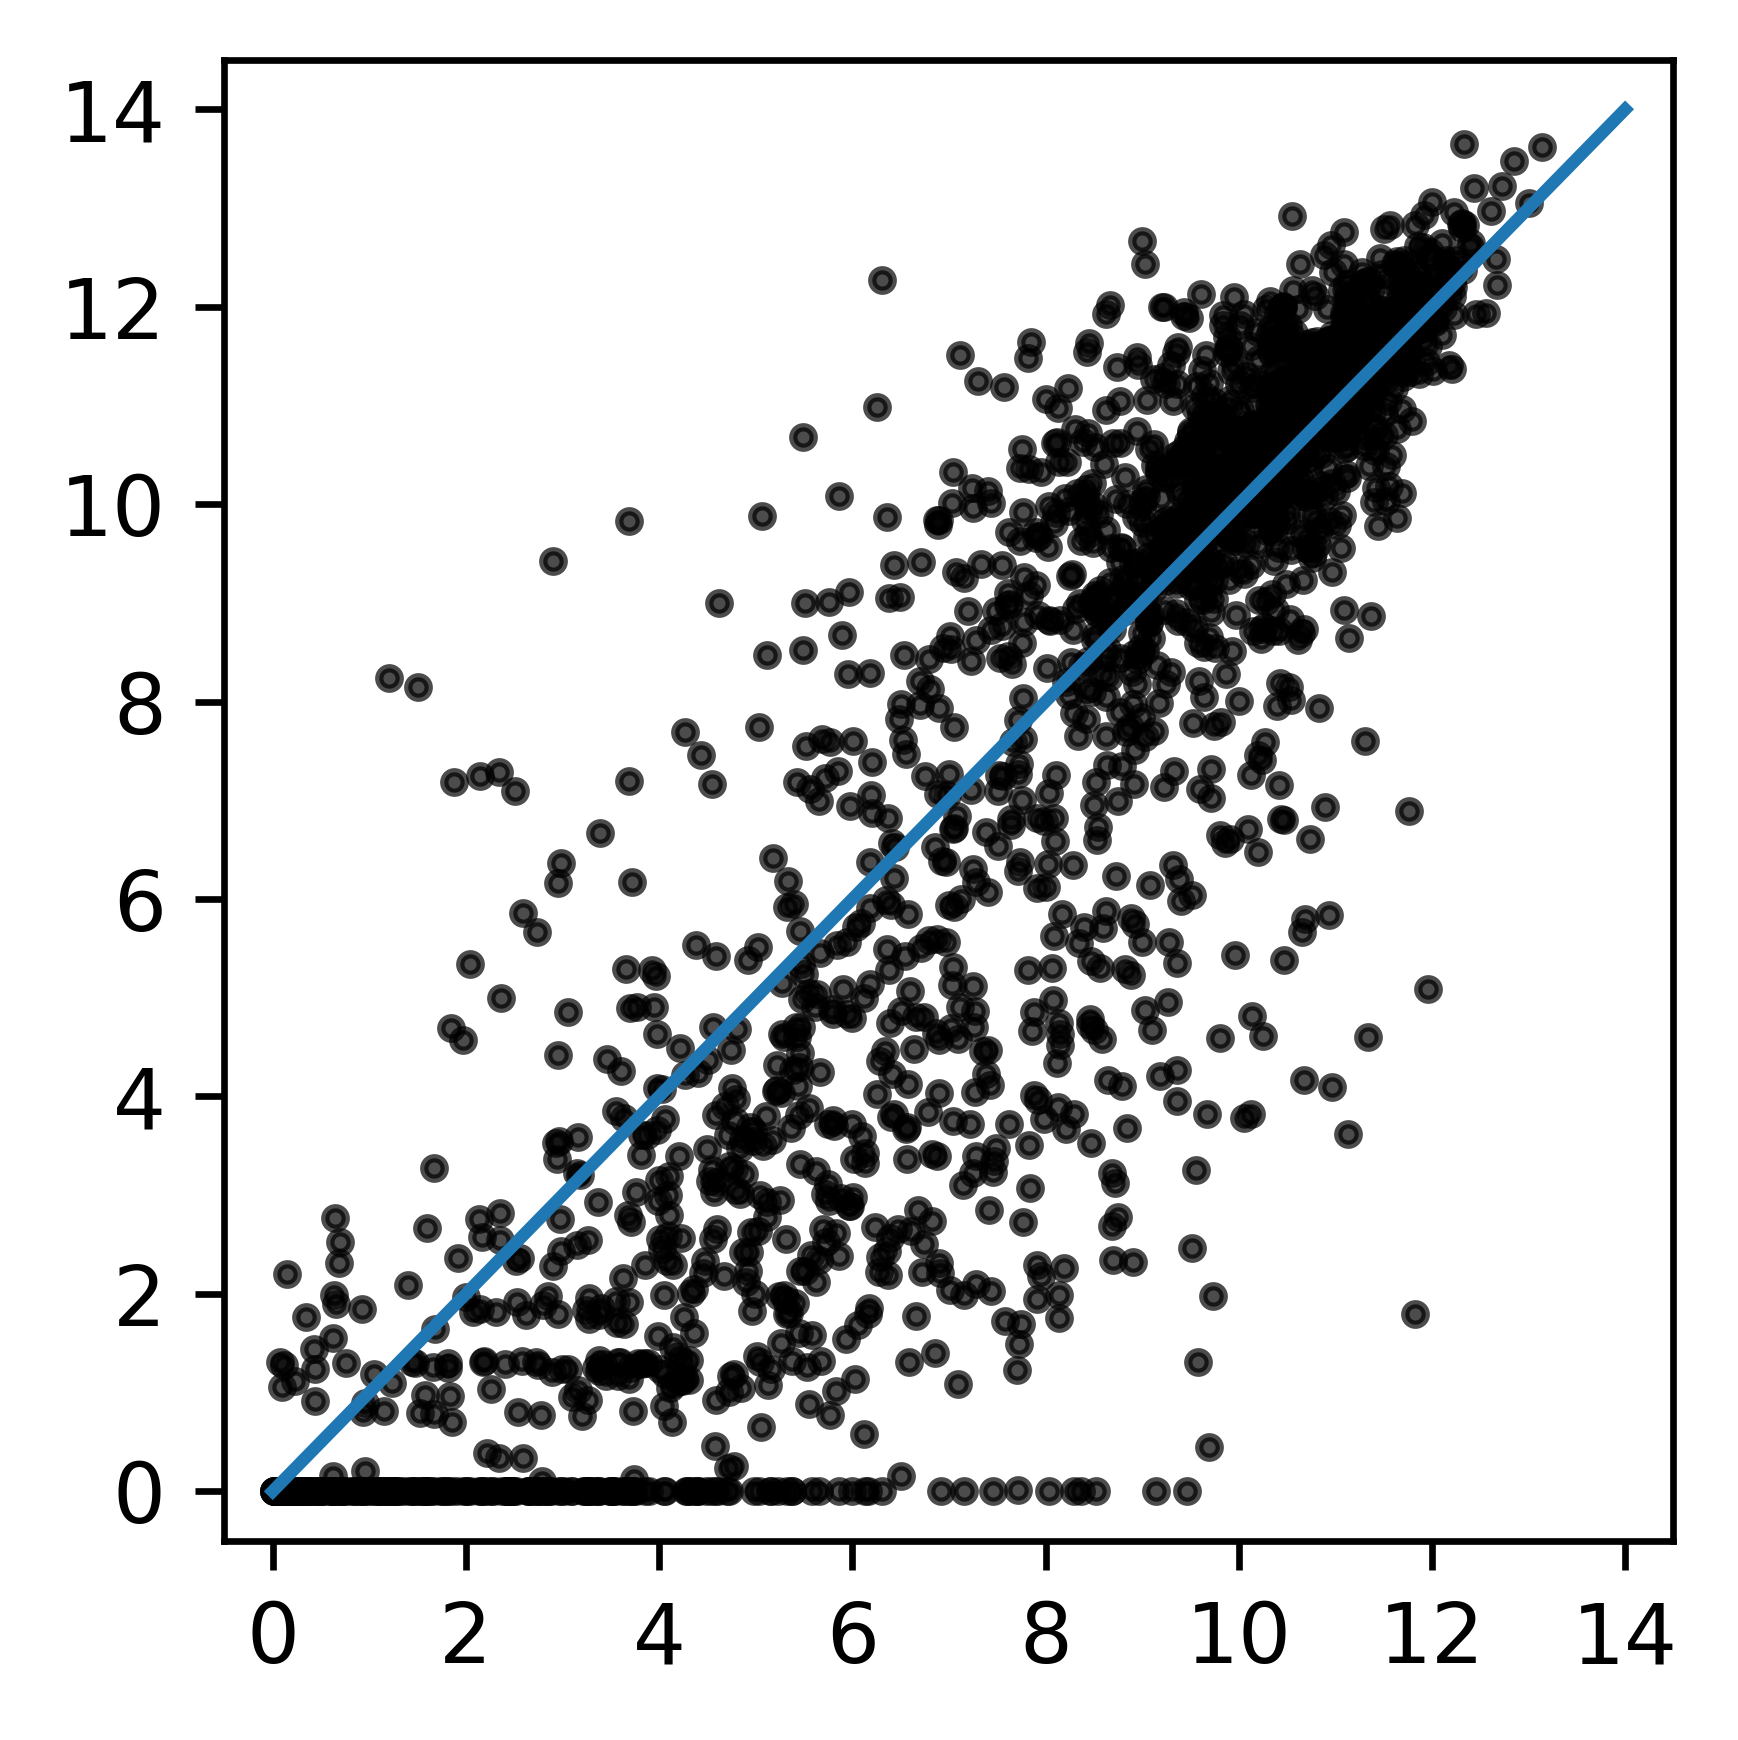

In [6]:
#Plot test predictions (ensemble) for GTEx blood

import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

target_ix = 875

y_p = np.array(df_pred[cols[target_ix]].values, dtype='float32')
y_t = np.array(df_true[cols[target_ix]].values, dtype='float32')

print("Spearman R = " + str(round(spearmanr(y_p, y_t)[0], 3)))
print("Pearson R = " + str(round(pearsonr(y_p, y_t)[0], 3)))

print(" - n = " + str(len(df_pred)))

f = plt.figure(figsize=(3, 3), dpi=600)

plt.scatter(y_p, y_t, s=6, color='black', alpha=0.7, rasterized=True)

plt.plot([0, 14], [0, 14])

plt.xlim(0. - 0.5, 14. + 0.5)
plt.ylim(0. - 0.5, 14. + 0.5)

plt.xticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=10)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=10)

plt.tight_layout()

plt.savefig("borzoi_v2_gtex_blood_pred_ens.pdf")

plt.show()


In [7]:
#Print ENCODE T-cell target

targets_strand_df.loc[targets_strand_df['description'] == "RNA:T-cell male adult (38 years)"]


,identifier,pearsonr,r2,pearsonr_norm,r2_norm,pearsonr_gene,description,row_index
7064,ENCFF983RQU+,0.877252,0.768585,0.585388,0.338142,0.775168,RNA:T-cell male adult (38 years),591


Spearman R = 0.889
Pearson R = 0.889
 - n = 1940


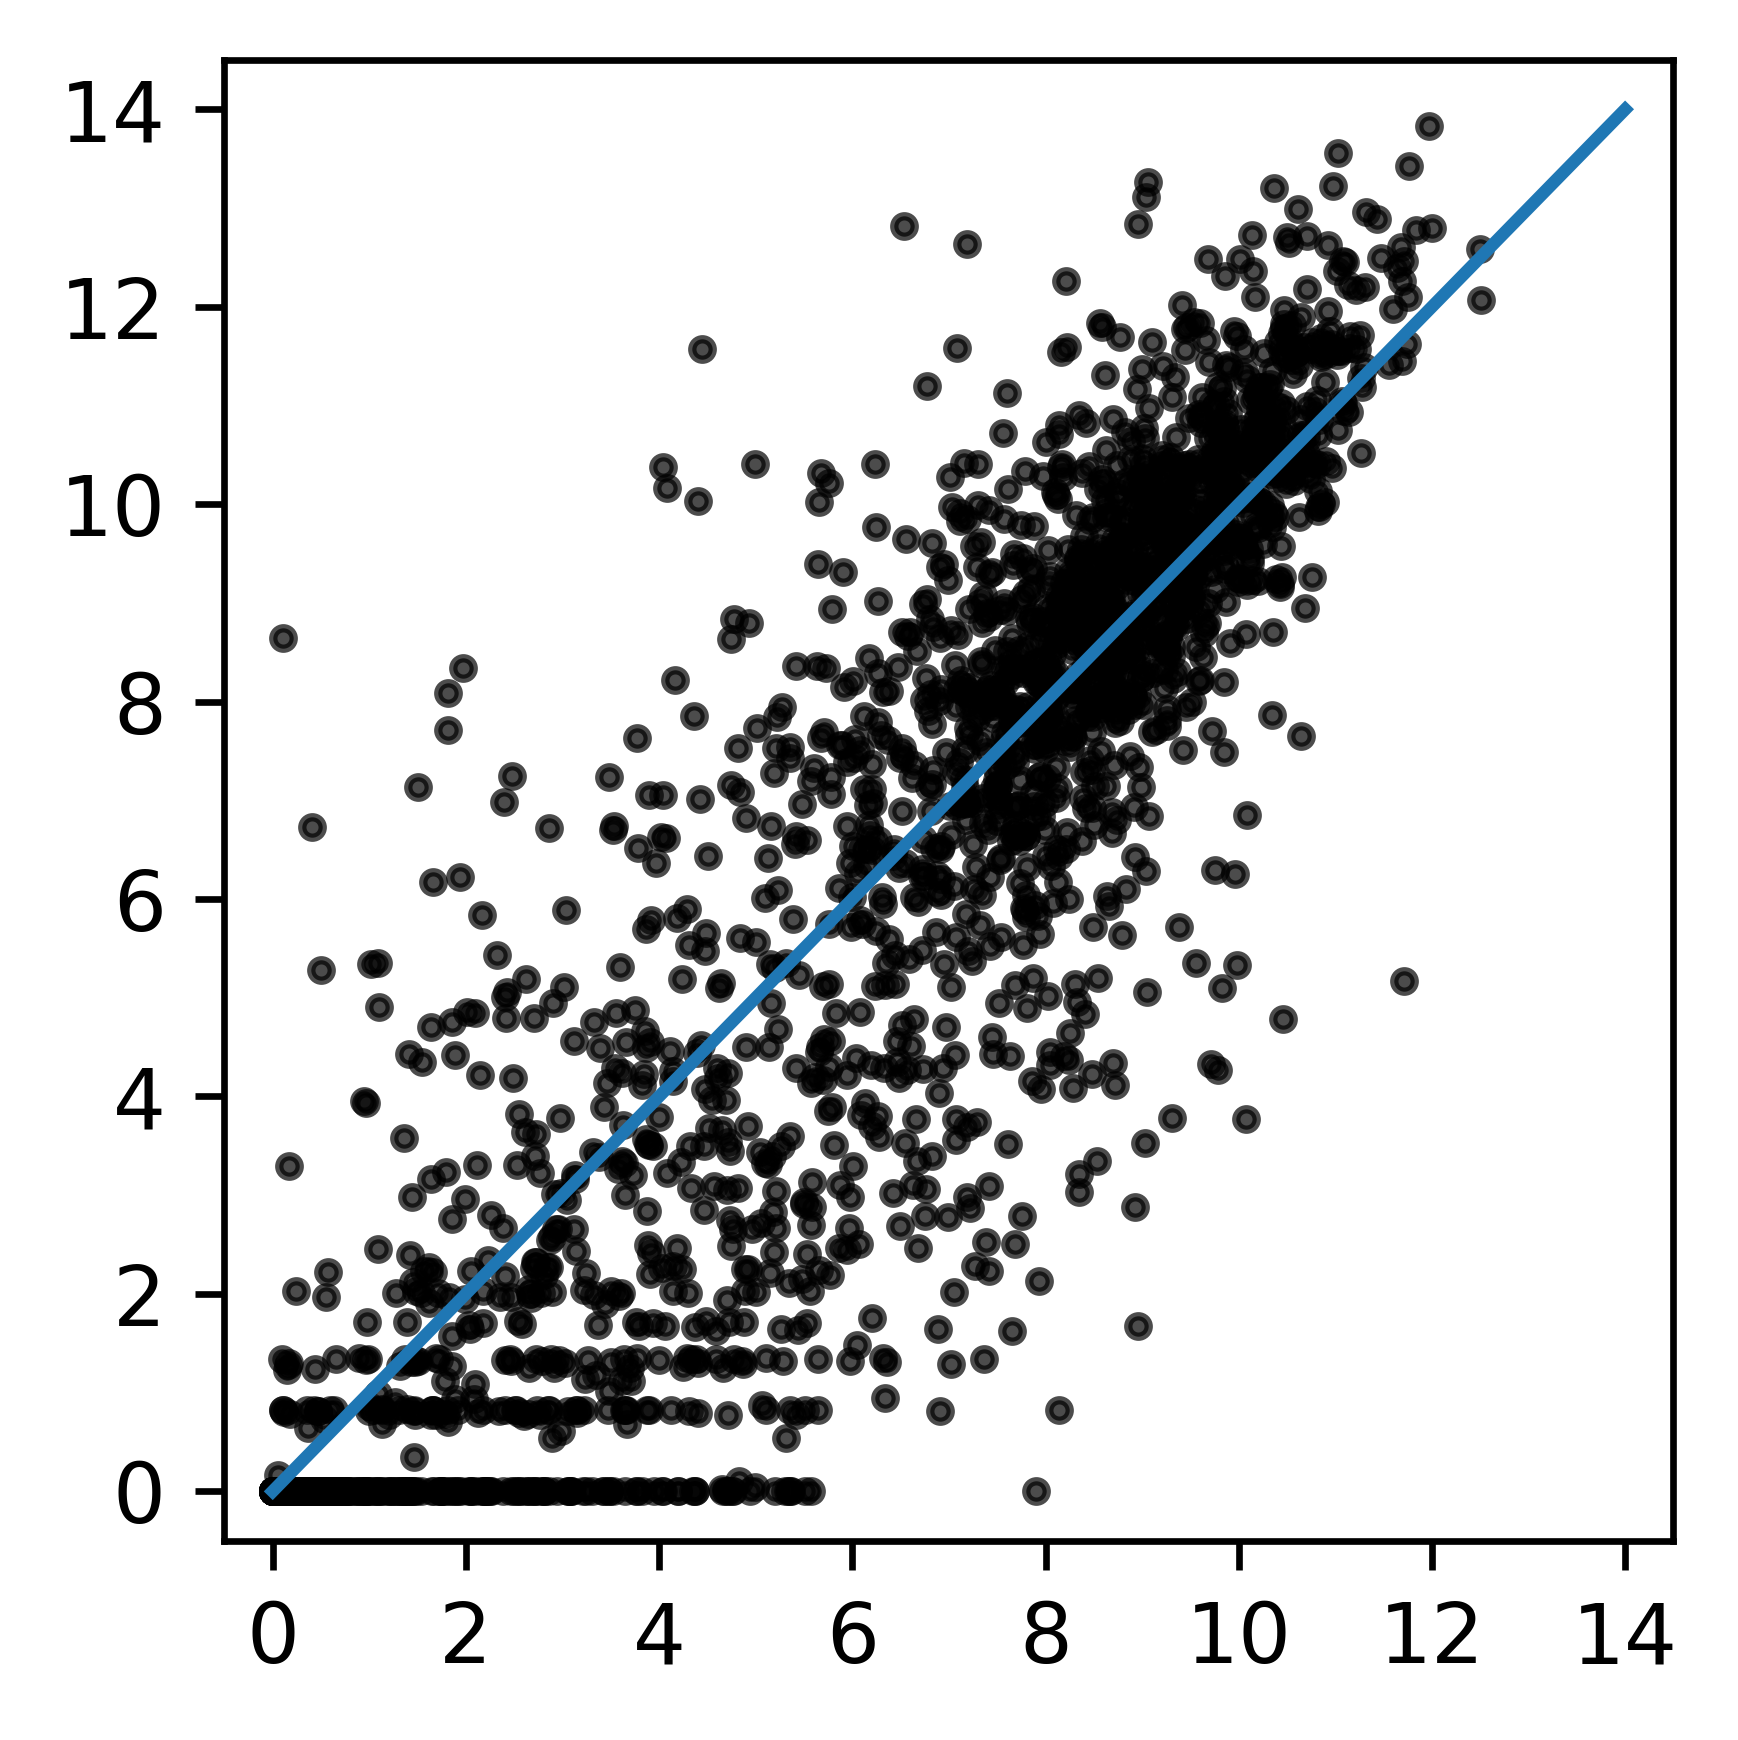

In [8]:
#Plot test predictions (ensemble) for ENCODE T-cells

import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

target_ix = 591

y_p = np.array(df_pred[cols[target_ix]].values, dtype='float32')
y_t = np.array(df_true[cols[target_ix]].values, dtype='float32')

print("Spearman R = " + str(round(spearmanr(y_p, y_t)[0], 3)))
print("Pearson R = " + str(round(pearsonr(y_p, y_t)[0], 3)))

print(" - n = " + str(len(df_pred)))

f = plt.figure(figsize=(3, 3), dpi=600)

plt.scatter(y_p, y_t, s=6, color='black', alpha=0.7, rasterized=True)

plt.plot([0, 14], [0, 14])

plt.xlim(0. - 0.5, 14. + 0.5)
plt.ylim(0. - 0.5, 14. + 0.5)

plt.xticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=10)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], fontsize=10)

plt.tight_layout()

plt.savefig("borzoi_v2_encode_tcell_pred_ens.pdf")

plt.show()
